# 科比职业生涯分析
> [数据集](https://www.kesci.com/home/dataset/599a6e66c8d2787da4d1e21d/project)

##  **科比-布莱恩特，数据背后的故事**
### **Kobe Bryant, the stories hidden in the data**
> ![image description](https://cdn.kesci.com/images/lab_upload/1505435704988_9079.jpg)

> 滚滚长江东逝水，
> 浪花淘尽英雄。
> 是非成败转头空，
> 青山依旧在，
> 几度夕阳红。
> 
> 白发渔樵江渚上，
> 惯看秋月春风。
> 一壶浊酒喜相逢，
> 古今多少事，
> 都付笑谈中。

> **明 杨慎《临江仙》**


### 数据集介绍
> **基础数据集(7份)**：
<br>player_season.csv：球员常规赛单场比赛数据
<br>player_playoff.csv：球员季后赛单场比赛数据
<br>player_salary.csv：球员薪金数据
<br>coach_season.csv：教练常规赛赛季平均数据
<br>coach_playoff.csv：教练季后赛赛季平均数据
<br>team_season.csv：球队常规赛单场比赛数据
<br>team_playoff.csv：球队常规赛单场比赛数据

> **进阶数据集(5份)**：1950-2017年NBA球员的一些常规赛进阶数据
<br>avg.csv：球员场均数据
<br>tot.csv：球员总计数据
<br>single.csv：球员单场最佳
<br>advanced_basic.csv：球员进阶数据
<br>advanced_shooting.csv：球员进阶数据——投篮

2016年4月14日，科比-五个NBA总冠军的得主，正式告别篮球。他曾是湖人王朝的缔造者之一，联盟第一人，甚至历史上最强得分手之一。

科比的20年NBA数据：

|荣誉榜|次数| 赛季|
|------  |------ |------ --- |
|常规赛MVP|1|2007~2008 |
|总决赛MVP|2|2008~2009， 2009~2010|
|NBA得球王|2|2005~2006，2006~2007|
|奥运会冠军|2|2008（北京），2012（伦敦）|
|NBA总冠军|2|2000，2001，2002，2009，2010|
|全明星MVP|4|2002，2007，2009，2011|
|入选全明星次数|18|1998，1999~2016|

科比在他的退役宣言中说道：“我带着伤痛打球，打到汗流浃背，不是因为挑战呼唤了我，而是因为你呼唤了我。我所做的一切都是为了你，因为你能够让一个人感受到鲜活的生命感。”


**获奖：**

1).NBA最有价值球员奖（2008）

2).两届NBA总决赛最有价值球员奖（2009-2010）

3).四届NBA全明星赛最有价值球员奖（2002,2007,2009,2011）

4).五届NBA总冠军（2000-2002,2009-2010)

5).18次全明星（1998,2000-2016）


![image description](https://cdn.kesci.com/images/lab_upload/1505435735193_86789.jpg)

In [5]:
## 季后赛数据分析

import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
player_playoff = pd.read_csv('./NBAdata/player_playoff.csv')
# 处理日期
def seasionYear(seasion):
    year = seasion.split('-')[1]
    if (year >= '80') & (year <= '99'):
        year = '19' + year
    else:
        year = '20' + year
    return year

In [6]:
#增加赛季字段，整理年份
player_playoff['赛季'] = player_playoff['赛季'].apply(lambda x: seasionYear(x))
player_playoff.sort_values(by=['赛季'], inplace=True)
Kobe_playoff = player_playoff.loc[player_playoff['球员'] == 'Kobe Bryant', ]

In [7]:
#[item[0] for item in player_playoff.groupby(by = ['球员', '赛季'])['得分'].count().index.tolist()]
years = player_playoff['赛季'].unique().tolist()
players = player_playoff['球员'].unique().tolist()
maxScores = []
for year in years:
    #print("Processing year {0}.".format(year))
    maxScore = 0
    for player in players:
        score = player_playoff.loc[(player_playoff['球员'] == player) & (player_playoff['赛季'] == year), ]['得分'].sum()
        if maxScore < score:
            maxScore = score
    maxScores.append(maxScore)

#### 科比NBA历年季后赛汇总

In [8]:
KobeStas = pd.DataFrame([])
KobeStas['赛季'] = Kobe_playoff.groupby(['赛季'])['结果'].count().index
KobeStas['总场数'] = Kobe_playoff.groupby(['赛季'])['结果'].count().tolist()
KobeStas['获胜数'] = Kobe_playoff.loc[player_playoff['结果'] == 'W', ].groupby(['赛季'])['结果'].count().tolist()
KobeStas['均时'] = Kobe_playoff.groupby(['赛季'])['时间'].mean().astype('int32').tolist()
KobeStas['投篮'] = Kobe_playoff.groupby(['赛季'])['投篮'].mean().tolist()
KobeStas['命中'] = Kobe_playoff.groupby(['赛季'])['命中'].mean().astype('int32').tolist()
KobeStas['出手'] = Kobe_playoff.groupby(['赛季'])['出手'].mean().astype('int32').tolist()
KobeStas['三分'] = Kobe_playoff.groupby(['赛季'])['三分'].mean().tolist()
KobeStas['篮板'] = Kobe_playoff.groupby(['赛季'])['篮板'].mean().astype('int32').tolist()
KobeStas['后场'] = Kobe_playoff.groupby(['赛季'])['后场'].mean().astype('int32').tolist()
KobeStas['平均得分'] = Kobe_playoff.groupby(['赛季'])['得分'].mean().astype('int32').tolist()
KobeStas['总得分'] = Kobe_playoff.groupby(['赛季'])['得分'].sum().astype('int32').tolist()
# 历年季后赛最高分
playerStas = pd.DataFrame([])
playerStas['赛季'] = player_playoff.groupby(by = ['赛季'])['得分'].count().index
playerStas['最高分'] = maxScores
KobeStas = pd.merge(KobeStas, playerStas, how='left', on='赛季')


In [9]:
KobeStas

,赛季,总场数,获胜数,均时,投篮,命中,出手,三分,篮板,后场,平均得分,总得分,最高分
0,1997,9,4,14,0.507750,2,6,0.227833,1,1,8,74,590
1,1998,11,5,20,0.474600,2,6,0.375000,1,1,8,96,680
2,1999,8,3,39,0.440125,7,17,0.372750,6,5,19,158,407
3,2000,22,15,38,0.431091,7,17,0.291238,4,3,21,465,707
4,2001,16,15,43,0.473438,10,22,0.311133,7,5,29,471,723
5,2002,19,15,43,0.437842,9,22,0.305389,5,4,26,506,541
6,2003,12,6,44,0.433833,11,26,0.417250,5,3,32,385,593
7,2004,22,13,44,0.410818,8,20,0.192182,4,3,24,539,539
8,2006,7,3,45,0.495429,10,20,0.381000,6,5,27,195,654
9,2007,5,1,42,0.458200,12,26,0.373400,5,5,32,164,501


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style 
style.use('ggplot')
# 设置warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False #作用就是解决负号'-'显示为方块的问题

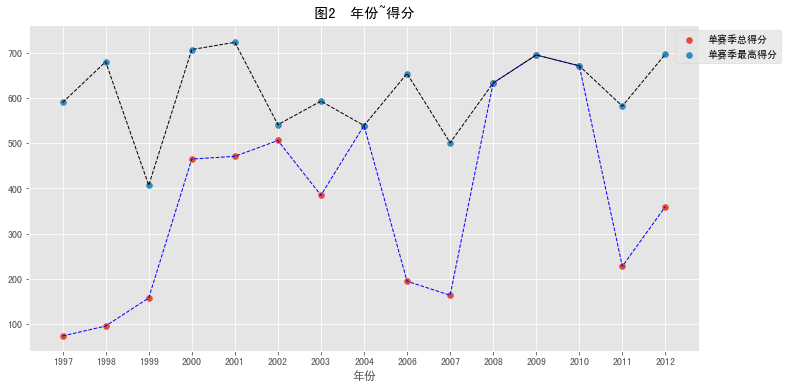

In [14]:
years = KobeStas['赛季'].tolist()
totoalScores = KobeStas['总得分'].tolist()
maxScores = KobeStas['最高分'].tolist()
plt.figure(1, figsize=(12,6))
# plt.axes(axisbg='#F5F5F5')
plt.scatter(years, totoalScores, label='单赛季总得分')
plt.plot(years, totoalScores, linestyle='--', linewidth=1, color='blue')
plt.scatter(years, maxScores, label='单赛季最高得分')
plt.plot(years, maxScores, linestyle='--', linewidth=1, color='black')
plt.title('图2  年份~得分')
plt.xlabel('年份')
plt.legend(bbox_to_anchor=(1.13, 1))
plt.show()

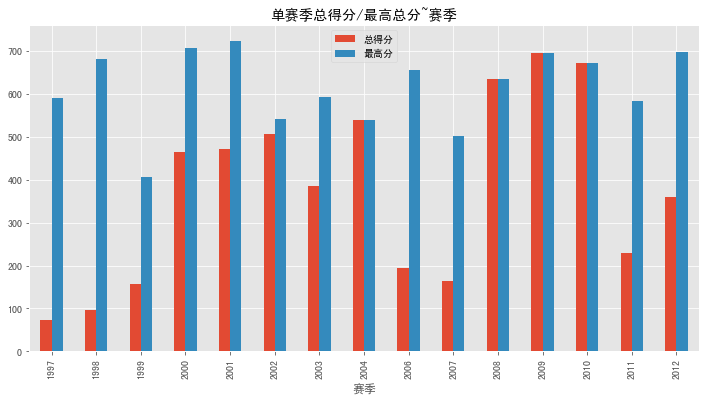

In [15]:
KobeStas.plot(x='赛季', y=['总得分', '最高分'], kind='bar', figsize=(12, 6), title='单赛季总得分/最高总分~赛季')
plt.show()

### 数据背后的故事
>科比20年的NBA篮球生涯全部献给了湖人队，从1996年到2016年，科比几经沉浮，2000~2002年、2007~2010年是科比的两个巅峰，虽然科比离开NBA，
>但他带给我们的却不会随风消散，独一无二的科比，独一无二的青春岁月。

### 1.1996年，进入湖人队
1996年，乔丹带领芝加哥公牛队72胜并且夺冠，再次封神，湖人53胜。
<br>这一年，科比18岁，湖人队用迪瓦茨与黄蜂换来了他，他也成为NBA历史上出场最年轻的球员。

In [16]:
import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
player_season = pd.read_csv('./NBAdata/player_season.csv')
Kobe_season96 = player_season.loc[(player_season['球员'] == 'Kobe Bryant') & (player_season['赛季'] == '96-97'), ]

In [17]:
Kobe_season96Stats = pd.DataFrame([])
Kobe_season96Stats['球员'] = ['Kobe Bryant']
Kobe_season96Stats['上场数'] = Kobe_season96['命中'].count().tolist()
Kobe_season96Stats['总上场时间'] = Kobe_season96['时间'].sum().tolist()
Kobe_season96Stats['上场均时'] = Kobe_season96['时间'].mean().astype('int32').tolist()
Kobe_season96Stats['投篮命中数'] = Kobe_season96['命中'].sum().tolist()
Kobe_season96Stats['总出手数'] = Kobe_season96['出手'].sum().tolist()
Kobe_season96Stats['三分命中数'] = Kobe_season96['三分命中'].sum().tolist()
Kobe_season96Stats['三分出手数'] = Kobe_season96['三分出手'].sum().tolist()
Kobe_season96Stats['罚球命中数'] = Kobe_season96['罚球命中'].sum().tolist()
Kobe_season96Stats['篮板数'] = Kobe_season96['篮板'].sum().tolist()
Kobe_season96Stats['前场数'] = Kobe_season96['前场'].sum().tolist()
Kobe_season96Stats['后场数'] = Kobe_season96['后场'].sum().tolist()
Kobe_season96Stats['助攻数'] = Kobe_season96['助攻'].sum().tolist()
Kobe_season96Stats['抢断数'] = Kobe_season96['抢断'].sum().tolist()
Kobe_season96Stats['盖帽数'] = Kobe_season96['盖帽'].sum().tolist()
Kobe_season96Stats['失误数'] = Kobe_season96['失误'].sum().tolist()
Kobe_season96Stats

,球员,上场数,总上场时间,上场均时,投篮命中数,总出手数,三分命中数,三分出手数,罚球命中数,篮板数,前场数,后场数,助攻数,抢断数,盖帽数,失误数
0,Kobe Bryant,71,1103,15,176,422,51,136,136,132,47,85,91,49,23,112


In [19]:
import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
team_season = pd.read_csv('./NBAdata/team_season.csv')
team_season = team_season.loc[(team_season['时间'] >= '1995-10-01') & (team_season['时间'] <= '1996-07-01'), ]
WinCntsByTeam = pd.DataFrame([])
WinCntsByTeam['球队'] = team_season.loc[(team_season['结果'] == 'W'), ].groupby(by=['球队'])['结果'].count().index
WinCntsByTeam['获胜数'] = team_season.loc[(team_season['结果'] == 'W'), ].groupby(by=['球队'])['结果'].count().tolist()
WinCntsByTeam['赛季总得分'] = team_season.groupby(by=['球队'])['得分'].sum().tolist()
WinCntsByTeam.sort_values(by=['获胜数'], ascending=False, inplace=True)

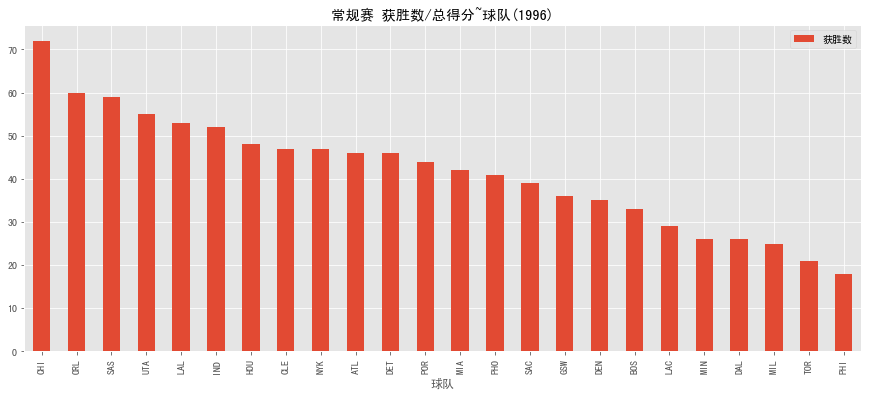

In [20]:
WinCntsByTeam.plot(x='球队', y=['获胜数'], kind='bar', figsize=(15, 6), title='常规赛 获胜数/总得分~球队(1996)')
plt.show()

### 2.1996~1999，初露锋芒

In [21]:
KobeStas = pd.DataFrame([])
KobeData = player_playoff.loc[(player_playoff['赛季'] <= '1999') & (player_playoff['赛季'] >= '1997') & (player_playoff['球员'] == 'Kobe Bryant'), ]
KobeStas['赛季'] = KobeData.groupby(['赛季'])['结果'].count().index
KobeStas['总场数'] = KobeData.groupby(['赛季'])['结果'].count().tolist()
KobeStas['平均得分'] = KobeData.groupby(['赛季'])['得分'].mean().astype('int32').tolist()
KobeStas['总得分'] = KobeData.groupby(['赛季'])['得分'].sum().astype('int32').tolist()
KobeStas

,赛季,总场数,平均得分,总得分
0,1997,9,8,74
1,1998,11,8,96
2,1999,8,19,158


### 3.1999~2002，三连冠

In [22]:
KobeStas = pd.DataFrame([])
KobeData = player_playoff.loc[(player_playoff['赛季'] <= '2002') & (player_playoff['赛季'] > '1999') & (player_playoff['球员'] == 'Kobe Bryant'), ]
KobeStas['赛季'] = KobeData.groupby(['赛季'])['结果'].count().index
KobeStas['总场数'] = KobeData.groupby(['赛季'])['结果'].count().tolist()
KobeStas['平均得分'] = KobeData.groupby(['赛季'])['得分'].mean().astype('int32').tolist()
KobeStas['总得分'] = KobeData.groupby(['赛季'])['得分'].sum().astype('int32').tolist()
KobeStas

,赛季,总场数,平均得分,总得分
0,2000,22,21,465
1,2001,16,29,471
2,2002,19,26,506


### 4.2002~2004，短暂的低潮
### 5.2004~2007，失望季后赛
04~05赛季，科比与奥尼尔分道扬镳。奥尼尔本人主动要求转会，这也将是科比首个没有奥尼尔的赛季。这是湖人最近10年首次没能闯入季后赛的赛季。
此后，科比搁浅了连续两个赛季。
### 6.2007~2008，MVP赛季
### 7.2008~2010，蝉联总冠军
### 8.2010~2013，追逐六连冠
### 9.2013~2015，携伤复出
### 10.2015 宣告正式退役